In [1]:
import pandas as pd


In [2]:
project = pd.read_excel("data/raw/project.xlsx")
euscivoc = pd.read_excel("data/raw/euroSciVoc.xlsx")


In [3]:
print(project.shape)
print(project.columns)
print(euscivoc.shape)
print(euscivoc.columns)


(15341, 20)
Index(['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 'totalCost',
       'ecMaxContribution', 'legalBasis', 'topics', 'ecSignatureDate',
       'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme',
       'nature', 'objective', 'contentUpdateDate', 'rcn', 'grantDoi'],
      dtype='object')
(38789, 5)
Index(['projectID', 'euroSciVocCode', 'euroSciVocPath', 'euroSciVocTitle',
       'euroSciVocDescription'],
      dtype='object')


In [4]:
project[["id", "acronym", "title", "objective"]][:5]


,id,acronym,title,objective
0,101116741,DOE,Digitizing Other Economies: A Comparative Appr...,"How do longstanding, primarily non-industrial,..."
1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,The James Webb Space Telescope (JWST) has ushe...
2,101160499,In-phase,Multiscale modelling of aberrant phase transit...,The spatiotemporal organization of the cell ma...
3,101166905,mw-atlas,The first comprehensive Atlas of the Milky Way,The Milky Way is the cosmic environment in whi...
4,101162875,MAtCHLESS,Untapping multiparametric 2D luminescence sens...,Cellular organisms are complex machines whose ...


In [5]:
project.head()


,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101116741,DOE,SIGNED,Digitizing Other Economies: A Comparative Appr...,2024-02-01,2029-01-31,1499998,1499998,HORIZON.1.1,ERC-2023-STG,2023-12-15,HORIZON,ERC-2023-STG,ERC-2023-STG,HORIZON-ERC,NaN,"How do longstanding, primarily non-industrial,...",2023-12-26 14:40:12,259247,10.3030/101116741
1,101163161,IRASTRO,SIGNED,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,2025-08-01,2031-07-31,12085363,12085363,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The James Webb Space Telescope (JWST) has ushe...,2025-02-24 17:23:14,268970,10.3030/101163161
2,101160499,In-phase,SIGNED,Multiscale modelling of aberrant phase transit...,2025-06-01,2030-05-31,1489128,1489128,HORIZON.1.1,ERC-2024-STG,2025-02-19,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,The spatiotemporal organization of the cell ma...,2025-02-24 17:23:11,268969,10.3030/101160499
3,101166905,mw-atlas,SIGNED,The first comprehensive Atlas of the Milky Way,2025-05-01,2031-04-30,9957560,9957560,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The Milky Way is the cosmic environment in whi...,2025-02-24 17:23:01,268971,10.3030/101166905
4,101162875,MAtCHLESS,SIGNED,Untapping multiparametric 2D luminescence sens...,2025-03-01,2030-02-28,1500000,1500000,HORIZON.1.1,ERC-2024-STG,2025-02-18,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,Cellular organisms are complex machines whose ...,2025-02-24 17:23:12,268966,10.3030/101162875


In [6]:
# Group values by projectID since one project may belong to multiple fields

euscivoc_grouped = euscivoc.groupby("projectID")[["euroSciVocCode", "euroSciVocPath", "euroSciVocTitle"]].agg(list).reset_index()


In [7]:
# Merge scientific topic to project

project_merged = pd.merge(project, euscivoc_grouped, left_on="id", right_on="projectID", how="left")
project_merged.shape


(15341, 24)

In [8]:
health_df = project_merged[project_merged["euroSciVocPath"].apply(
    lambda paths: isinstance(paths, list) and any("/medical and health sciences" in p for p in paths)
)]
health_df.shape


(3508, 24)

/tmp/ipykernel_1934452/3369798661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_df["Words Per Abstract"] = health_df["objective"].str.split().apply(len)


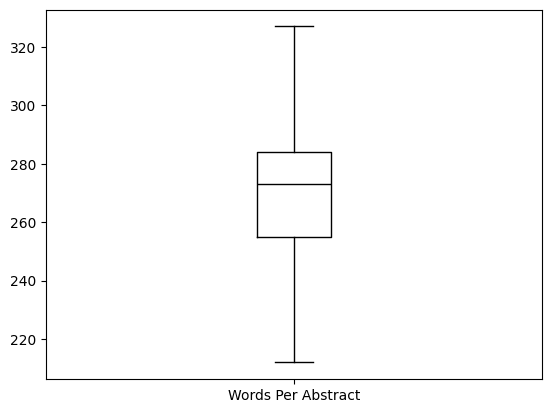

In [9]:
import matplotlib.pyplot as plt

health_df["Words Per Abstract"] = health_df["objective"].str.split().apply(len)
health_df.boxplot("Words Per Abstract", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()


In [ ]:
# health_df.to_csv("data/interim/health_sup.csv")


In [ ]:
health_df = health_df[health_df["status"] != "TERMINATED"]


In [ ]:
health_df.to_csv("data/interim/health.csv")
